In [9]:
import numpy as np
import matplotlib.pyplot as plt
import os
import time
import struct
import requests
from datetime import datetime, timedelta
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from scipy.fftpack import fft
from scipy.signal import get_window, spectrogram
import pickle
import re
from collections import Counter

# only 111

In [108]:
#ZCU111 SBL list >5%
zcu111_list=np.array([
 'LERFUJI_2024-10-13_00-10-19.npz',
 'LERFUJI_2024-10-13_09-25-06.npz',
 'LERFUJI_2024-10-13_12-47-29.npz',
 'LERFUJI_2024-10-13_14-34-59.npz',
 'LERFUJI_2024-10-14_01-44-58.npz',
 'LERFUJI_2024-10-14_02-20-24.npz',
 'LERFUJI_2024-10-14_15-02-49.npz',
 'LERFUJI_2024-10-15_01-18-06.npz',
 'LERFUJI_2024-10-15_05-30-08.npz',
 'LERFUJI_2024-10-15_08-37-16.npz',
 'LERFUJI_2024-10-15_11-30-38.npz',
 'LERFUJI_2024-10-15_20-22-59.npz',
 'LERFUJI_2024-10-15_20-56-49.npz',
 'LERFUJI_2024-10-15_22-52-26.npz',
 'LERFUJI_2024-10-15_23-43-13.npz',
 'LERFUJI_2024-10-16_01-29-20.npz',
 'LERFUJI_2024-10-16_02-27-58.npz',
 'LERFUJI_2024-10-16_04-52-14.npz',
 'LERFUJI_2024-10-17_09-02-58.npz',
 'LERFUJI_2024-10-17_09-32-06.npz',
 'LERFUJI_2024-10-18_02-29-34.npz',
 'LERFUJI_2024-10-18_03-07-24.npz',
 'LERFUJI_2024-10-18_03-27-52.npz',
 'LERFUJI_2024-10-18_09-17-07.npz',
 'LERFUJI_2024-10-18_15-51-23.npz',
 'LERFUJI_2024-10-18_19-22-55.npz',
 'LERFUJI_2024-10-18_23-01-11.npz',
 'LERFUJI_2024-10-19_00-02-36.npz',
 'LERFUJI_2024-10-19_02-46-12.npz',
 'LERFUJI_2024-10-19_05-21-33.npz',
 'LERFUJI_2024-10-19_06-12-19.npz',
 'LERFUJI_2024-10-19_06-35-20.npz',
 'LERFUJI_2024-10-19_09-05-05.npz',
 'LERFUJI_2024-10-19_10-19-12.npz',
 'LERFUJI_2024-10-19_18-05-55.npz',
 'LERFUJI_2024-10-19_21-33-36.npz',
 'LERFUJI_2024-10-20_10-14-52.npz',
 'LERFUJI_2024-10-20_11-00-25.npz',
 'LERFUJI_2024-10-20_13-51-29.npz',
 'LERFUJI_2024-10-20_20-21-44.npz',
 'LERFUJI_2024-10-21_00-19-58.npz',
 'LERFUJI_2024-10-21_00-35-06.npz',
 'LERFUJI_2024-10-21_07-54-25.npz',
 'LERFUJI_2024-10-21_08-08-53.npz',
 'LERFUJI_2024-10-21_08-59-35.npz',
 'LERFUJI_2024-10-22_00-58-30.npz',
 'LERFUJI_2024-10-22_02-30-09.npz',
 'LERFUJI_2024-10-22_03-20-25.npz',
 'LERFUJI_2024-10-22_09-20-05.npz',
 'LERFUJI_2024-10-22_09-37-16.npz',
 'LERFUJI_2024-10-22_09-56-32.npz',
 'LERFUJI_2024-10-23_03-16-57.npz',
 'LERFUJI_2024-10-26_16-37-24.npz',
 'LERFUJI_2024-10-26_20-37-51.npz',
 'LERFUJI_2024-10-27_02-02-02.npz',
 'LERFUJI_2024-10-27_05-01-04.npz',
 'LERFUJI_2024-10-27_05-25-07.npz',
 'LERFUJI_2024-10-27_06-17-55.npz',
 'LERFUJI_2024-10-27_06-55-20.npz',
 'LERFUJI_2024-10-27_13-43-55.npz',
 'LERFUJI_2024-10-27_15-10-13.npz',
 'LERFUJI_2024-10-27_15-32-04.npz',
 'LERFUJI_2024-10-27_21-28-33.npz',
 'LERFUJI_2024-10-27_23-44-12.npz',
 'LERFUJI_2024-10-28_02-06-05.npz',
 'LERFUJI_2024-10-28_02-30-07.npz',
 'LERFUJI_2024-10-28_02-55-30.npz',
 'LERFUJI_2024-10-28_19-13-27.npz',
 'LERFUJI_2024-10-29_01-41-14.npz',
 'LERFUJI_2024-10-29_03-00-30.npz',
 'LERFUJI_2024-10-29_15-19-37.npz',
 'LERFUJI_2024-10-29_17-51-52.npz',
 'LERFUJI_2024-10-29_19-49-12.npz',
 'LERFUJI_2024-10-29_22-59-36.npz',
 'LERFUJI_2024-10-29_23-49-03.npz',
 'LERFUJI_2024-10-30_02-02-03.npz',
 'LERFUJI_2024-10-30_02-30-10.npz',
 'LERFUJI_2024-11-01_03-49-06.npz',
 'LERFUJI_2024-11-01_04-31-16.npz',
 'LERFUJI_2024-11-02_08-54-09.npz',
 'LERFUJI_2024-11-02_12-30-45.npz',
 'LERFUJI_2024-11-02_13-51-41.npz',
 'LERFUJI_2024-11-02_16-48-53.npz',
 'LERFUJI_2024-11-02_19-05-51.npz',
 'LERFUJI_2024-11-03_01-33-25.npz',
 'LERFUJI_2024-11-03_03-33-06.npz',
 'LERFUJI_2024-11-03_03-58-26.npz',
 'LERFUJI_2024-11-03_11-46-08.npz',
 'LERFUJI_2024-11-03_17-35-45.npz',
 'LERFUJI_2024-11-03_17-56-46.npz',
 'LERFUJI_2024-11-03_20-11-52.npz',
 'LERFUJI_2024-11-03_23-57-50.npz',
 'LERFUJI_2024-11-04_04-14-19.npz',
 'LERFUJI_2024-11-04_09-57-37.npz',
 'LERFUJI_2024-11-04_14-40-20.npz',
 'LERFUJI_2024-11-04_21-12-50.npz',
 'LERFUJI_2024-11-04_22-05-43.npz',
 'LERFUJI_2024-11-05_04-53-14.npz',
 'LERFUJI_2024-11-05_10-06-20.npz',
 'LERFUJI_2024-11-05_10-37-18.npz',
 'LERFUJI_2024-11-05_11-56-33.npz',
 'LERFUJI_2024-11-05_16-29-27.npz',
 'LERFUJI_2024-11-05_20-32-53.npz',
 'LERFUJI_2024-11-06_04-06-18.npz',
 'LERFUJI_2024-11-06_05-48-50.npz',
 'LERFUJI_2024-11-07_16-25-57.npz',
 'LERFUJI_2024-11-08_08-50-27.npz',
 'LERFUJI_2024-11-08_16-43-14.npz',
 'LERFUJI_2024-11-08_16-58-08.npz',
 'LERFUJI_2024-11-09_08-59-06.npz',
 'LERFUJI_2024-11-09_23-06-12.npz',
 'LERFUJI_2024-11-10_03-27-52.npz',
 'LERFUJI_2024-11-11_05-25-24.npz',
 'LERFUJI_2024-11-11_10-54-27.npz',
 'LERFUJI_2024-11-11_11-42-48.npz',
 'LERFUJI_2024-11-11_12-41-57.npz',
 'LERFUJI_2024-11-12_19-38-00.npz',
 'LERFUJI_2024-11-13_23-16-26.npz',
 'LERFUJI_2024-11-15_08-22-08.npz',
 'LERFUJI_2024-11-15_20-34-41.npz',
 'LERFUJI_2024-11-16_01-15-10.npz',
 'LERFUJI_2024-11-16_03-39-21.npz',
 'LERFUJI_2024-11-18_03-28-51.npz',
 'LERFUJI_2024-11-22_23-42-46.npz'])

pressure=[
'D10_L02/03',
'D10_L02/03',
'D04_L07',
'D10_L02/03',
'D10_L02/03',
'D10_L02/03',
'D10_L02/03',
'D10_L02/03',
'D10_L02/03',
'D10_L02/03',
'D04_L06',
'D10_L02/03',
'D10_L02/03',
'D04_L07',
'D10_L02/03',
'D10_L06',
'D10_L02/03',
'nan',
'D10_L02/03',
'D10_L02/03',
'D04_L05',
'nan',
'nan',
'D04_L04',
'D10_L02/03',
'D10_L07',
'D10_L07',
'D10_L02/03',
'D10_L02/03',
'D04_L06',
'D10_L02/03',
'D04_L04',
'D10_L02/03',
'nan',
'D10_L02/03',
'D10_L02/03',
'D10_L02/03',
'D10_L02/03',
'D10_L02/03',
'D10_L02/03',
'D10_L02/03',
'D10_L02/03',
'D10_L02/03',
'D10_L02/03',
'D10_L02/03',
'D10_L05',
'D10_L08',
'D10_L08',
'D10_L08',
'D10_L05',
'D10_L05',
'D10_L02/03',
'D10_L02/03',
'D10_L02/03',
'D10_L02/03',
'D10_L02/03',
'D10_L02/03',
'D10_L02/03',
'D10_L02/03',
'D10_L08',
'D10_L08',
'D10_L02/03',
'D10_L05',
'D05_L23',
'D10_L02/03',
'D10_L05',
'D10_L02/03',
'D10_L02/03',
'D10_L02/03',
'nan',
'D04_L07',
'D10_L02/03',
'D10_L05',
'D10_L02/03',
'D10_L02/03',
'D10_L02/03',
'D10_L05',
'D10_L02/03',
'D10_L07',
'D10_L02/03',
'D10_L02/03',
'D10_L02/03',
'nan',
'D10_L02/03',
'D10_L02/03',
'D10_L02/03',
'D10_L02/03',
'nan',
'nan',
'nan',
'D10_L02/03',
'D10_L02/03',
'D10_L02/03',
'D10_L02/03',
'D10_L02/03',
'D10_L02/03',
'D10_L02/03',
'D10_L02/03',
'D10_L02/03',
'D10_L02/03',
'D10_L02/03',
'D10_L02/03',
'D10_L02/03',
'D10_L02/03',
'D10_L02/03',
'nan',
'D10_L06',
'nan',
'nan',
'nan',
'nan',
'D10_L06',
'nan',
'D02_L25',
'nan',
'D10_L07',
'D11_L19',
'D08_L12',
'nan',
'D06_L12',
'D04_L02',
'D06_L12',
'D10_L02/03',
'D10_L08']

optics=np.array([
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1
])

In [59]:
len(optics)

124

In [25]:
np.unique(np.array(pressure))

array(['D02_L25', 'D04_L02', 'D04_L04', 'D04_L05', 'D04_L06', 'D04_L07',
       'D05_L23', 'D06_L12', 'D08_L12', 'D10_L02/03', 'D10_L05',
       'D10_L06', 'D10_L07', 'D10_L08', 'D11_L19', 'nan'], dtype='<U10')

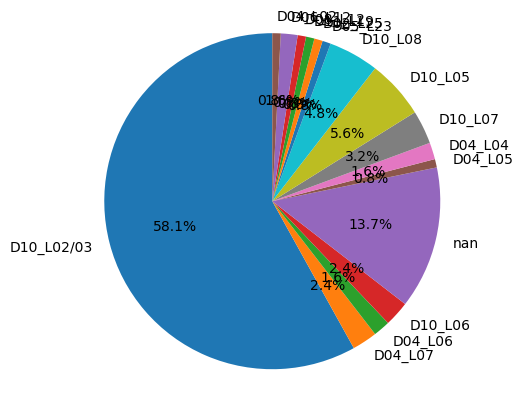

In [11]:
counter = Counter(pressure)

# 円グラフを作成
labels = counter.keys()
sizes = counter.values()

plt.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=90)
plt.axis("equal")  # 円を正確に描画
plt.show()

In [49]:
def make_plot(filename1,pressure):
    npz_kw = np.load('/mnt/SBOR/2024c_RFSoC/ZCU111/Abort/'+filename1,allow_pickle=True)
    X_sum=npz_kw['X_sum']
    X_delta=npz_kw['X_delta']
    Y_sum=npz_kw['Y_sum']
    Y_delta=npz_kw['Y_delta']
    print(len(X_sum))

    
    if filename1=="LERFUJI_2024-10-16_08-57-48.npz":
        return
    if filename1=="LERFUJI_2024-10-15_19-08-53.npz":
        return
    if filename1=="LERFUJI_2024-10-16_01-58-36.npz":
        Y_sum=np.zeros(len(Y_delta))

    timesteps2=np.arange(len(X_sum))/509
    timesteps2=timesteps2-timesteps2[-1]
    
    ##################    



    df = pd.DataFrame({'x':timesteps2,'X_sum':X_sum,'X_delta':X_delta,'Y_sum':Y_sum,'Y_delta':Y_delta})
    threshold=2000
    # 条件に従って 'result' を計算
    df['result_x'] = np.where(df['X_sum'] > threshold, df['X_delta'] / df['X_sum']*(16.58/5), 0)
    # 'result' から オフセットの値を引き算
    df['result_diff_x'] = df['result_x'] 
    offset = df['result_x'].iloc[0:5120].reset_index(drop=True)  # 1行目から5120行目の値
    
    for i in range(1, len(df) // 5120):
        start = i * 5120
        end = start + 5120-1
        df.loc[start:end, 'result_diff_x'] -= offset.values
    # 絶対値が 0.4 を超える場合は 0 に設定
    df['result_diff_x'] = np.where(abs(df['result_diff_x']) > 0.7, 0, df['result_diff_x'])
    # 'X_sum' が 2000 より小さい行の 'result' を NaN にする
    df['result_diff_x'] = np.where(df['X_sum'] <= threshold, np.nan, df['result_diff_x'])
    moving_avg = df['result_diff_x'].dropna().rolling(window=500).mean()
    moving_std = df['result_diff_x'].dropna().rolling(window=500).std()
    # 元のDataFrameに移動平均をマージ
    df['x_moving_avg'] = moving_avg.reindex(df.index)
    df['x_moving_std'] = moving_std.reindex(df.index)
    df['result_diff_x'] = np.where(df['X_sum'] <= threshold, np.nan, df['result_diff_x'])
    df['result_interp_x']=df['result_diff_x']#.interpolate(method='spline',order=1)

    df['result_y'] = np.where(df['X_sum'] > threshold, df['Y_delta'] / df['Y_sum']*(16.58/5), 0)
    # 'result' から 51200 行上の値を引き算
    df['result_diff_y'] = df['result_y']
    offset = df['result_y'].iloc[0:5120].reset_index(drop=True)  # 1行目から5120行目の値
    for i in range(1, len(df) // 5120):
        start = i * 5120
        end = start + 5120-1
        df.loc[start:end, 'result_diff_y'] -= offset.values
    # 絶対値が 0.4 を超える場合は 0 に設定
    df['result_diff_y'] = np.where(abs(df['result_diff_y']) > 0.7, 0, df['result_diff_y'])
    # 'X_sum' が 2000 より小さい行の 'result' を NaN にする
    df['result_diff_y'] = np.where(df['X_sum'] <= threshold, np.nan, df['result_diff_y'])
    moving_avg = df['result_diff_y'].dropna().rolling(window=500).mean()
    moving_std = df['result_diff_y'].dropna().rolling(window=500).std()
    # 元のDataFrameに移動平均をマージ
    df['y_moving_avg'] = moving_avg.reindex(df.index)
    df['y_moving_std'] = moving_std.reindex(df.index)
    df['result_diff_y'] = np.where(df['X_sum'] <= threshold, np.nan, df['result_diff_y'])
    df['result_interp_y']=df['result_diff_y']#.interpolate(method='spline',order=1)

    # 条件に従って 'result' を計算
    df['result_charge'] = np.where(df['X_sum'] > threshold,  df['X_sum']+df['Y_sum'], np.nan)
    # 'result' から 51200 行上の値を引き算
    df['result_diff_charge'] = df['result_charge'] / df['result_charge'].shift(51200)

    condition = df['X_sum'] <= 2000
    # 連続する2000以下の行数をカウント
    df['group'] = (condition != condition.shift()).cumsum()
    df['count'] = df.groupby('group')['X_sum'].transform('size')
    # 2000以下の連続が300行以上になる部分を削除
    index_to_drop = df[(condition) & (df['count'] >= 300)].index[0] if len(df[(condition) & (df['count'] >= 300)]) > 0 else None
    # 該当部分を削除
    if index_to_drop is not None:
        df = df[:index_to_drop]  # 連続部分の開始行以降を削除



    step_size = 40
    turn=len(df)//5120-10
    if turn<10:
        return np.nan
    tbtdata_111_x=df['result_interp_x'].iloc[len(df)-5120*turn:len(df)-0*5120].values
    tbtdata_111_x_ma=df['x_moving_avg'].iloc[len(df)-5120*turn:len(df)-0*5120].values
    tbtdata_111_x_std=df['x_moving_std'].iloc[len(df)-5120*turn:len(df)-0*5120].values
    tbtdata_111_y=df['result_interp_y'].iloc[len(df)-5120*turn:len(df)-0*5120].values
    tbtdata_111_y_ma=df['y_moving_avg'].iloc[len(df)-5120*turn:len(df)-0*5120].values
    tbtdata_111_y_std=df['y_moving_std'].iloc[len(df)-5120*turn:len(df)-0*5120].values
    charge_111=df['result_diff_charge'].iloc[len(df)-5120*turn:len(df)-0*5120].values
    
    #tbtdata_111=tbtdata_111.reshape(turn,5120)
    turn111=turn

    a=tbtdata_111_x_ma[-80*5120:]
    b=tbtdata_111_x_std[-80*5120:]*0.6
    index_111 = next(
            (i for i, (a_val, b_val) in enumerate(zip(a, b))
             if not np.isnan(a_val) and not np.isnan(b_val) and abs(a_val) > b_val),
            80*5120
        )
    index_111=index_111-80*5120
    print(index_111)
    a=tbtdata_111_y_ma[-80*5120:]
    b=tbtdata_111_y_std[-80*5120:]*0.6
    index_111_y = next(
            (i for i, (a_val, b_val) in enumerate(zip(a, b))
             if not np.isnan(a_val) and not np.isnan(b_val) and abs(a_val) > b_val),
            80*5120
        )
    index_111_y=index_111_y-80*5120
    print(index_111_y)

    fig, (ax1,ax2,ax3) = plt.subplots(3, 1, sharex=True,figsize=(16,6))
    timeaxis=np.arange(len(tbtdata_111_x))/5120
    timeaxis=timeaxis-timeaxis[-1]
    ax1.set_title(f'{filename1[8:-4]} / Pressure burst : {pressure}')
    ax1.scatter(timeaxis,tbtdata_111_x,c='red',s=1)
    ax1.plot(timeaxis,tbtdata_111_x_ma,'o-',c='green',markersize=0.02)
    #ax1.plot(timeaxis,tbtdata_111_x_std,'o-',c='green',markersize=1)
    time_111=timeaxis[index_111]
    ax1.vlines(time_111,-0.6,0.6)
    ax1.grid()
    ax1.set_ylim(-0.6,0.6)
    ax1.set_ylabel('Fuji X pos (mm)')
    timeaxis=np.arange(len(tbtdata_111_y))/5120
    timeaxis=timeaxis-timeaxis[-1]
    ax2.scatter(timeaxis,tbtdata_111_y,c='red',s=1)
    ax2.plot(timeaxis,tbtdata_111_y_ma,'o-',c='green',markersize=0.02)
    #ax2.plot(timeaxis,tbtdata_111_y_std,'o-',c='green',markersize=1)
    time_111_y=timeaxis[index_111_y]
    ax2.vlines(time_111_y,-0.6,0.6)
    ax2.grid()
    ax2.set_ylim(-0.6,0.6)
    #ax2.set_xticks([-15,-14,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0])
    ax2.set_ylabel('Fuji Y pos (mm)')
    
    timeaxis=np.arange(len(charge_111))/5120
    timeaxis=timeaxis-timeaxis[-1]
    ax3.scatter(timeaxis,charge_111,c='blue',s=1)
    index_charge_111 = next((i for i, x in enumerate(charge_111[-5120*10:]) if x < 0.95), None)
    if index_charge_111 is None:
        print('not SBL')
        plt.close()
        return
    index_charge_111+=5120*10
    charge_time_111=timeaxis[len(charge_111)-5120*20+index_charge_111]
    ax3.vlines(charge_time_111,0,1.2)
    ax3.grid()
    ax3.set_ylim(0,1.2)
    #ax3.set_xticks([-15,-14,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0])
    ax3.set_ylabel('Fuji charge (a.u.)')
    
    plt.xlim(-80,0)
    plt.xlabel('Turn')
    plt.savefig(f'masterthesis/{filename1[8:-4]}_111.png',dpi=100)
    plt.close()
    print(time_111)
    print(time_111_y)

    fig, (ax1,ax2,ax3) = plt.subplots(3, 1, sharex=True,figsize=(16,6))
    timeaxis=np.arange(len(tbtdata_111_x))/5120
    timeaxis=timeaxis-timeaxis[-1]
    ax1.set_title(f'{filename1[8:-4]} / Pressure burst : {pressure}')
    ax1.scatter(timeaxis,tbtdata_111_x,c='red',s=1)
    ax1.plot(timeaxis,tbtdata_111_x_ma,'o-',c='green',markersize=0.02)
    #ax1.plot(timeaxis,tbtdata_111_x_std,'o-',c='green',markersize=1)
    time_111=timeaxis[index_111]
    ax1.vlines(time_111,-0.6,0.6)
    ax1.grid()
    ax1.set_ylim(-0.6,0.6)
    ax1.set_ylabel('Fuji X pos (mm)')
    timeaxis=np.arange(len(tbtdata_111_y))/5120
    timeaxis=timeaxis-timeaxis[-1]
    ax2.scatter(timeaxis,tbtdata_111_y,c='red',s=1)
    ax2.plot(timeaxis,tbtdata_111_y_ma,'o-',c='green',markersize=0.02)
    #ax2.plot(timeaxis,tbtdata_111_y_std,'o-',c='green',markersize=1)
    time_111_y=timeaxis[index_111_y]
    ax2.vlines(time_111_y,-0.6,0.6)
    ax2.grid()
    ax2.set_ylim(-0.6,0.6)
    #ax2.set_xticks([-15,-14,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0])
    ax2.set_ylabel('Fuji Y pos (mm)')
    
    timeaxis=np.arange(len(charge_111))/5120
    timeaxis=timeaxis-timeaxis[-1]
    ax3.scatter(timeaxis,charge_111,c='blue',s=1)
    index_charge_111 = next((i for i, x in enumerate(charge_111[-5120*10:]) if x < 0.95), None)
    if index_charge_111 is None:
        print('not SBL')
        plt.close()
        return
    index_charge_111+=5120*10
    charge_time_111=timeaxis[len(charge_111)-5120*20+index_charge_111]
    ax3.vlines(charge_time_111,0,1.2)
    ax3.grid()
    ax3.set_ylim(0,1.2)
    ax3.set_xticks([-15,-14,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0])
    ax3.set_ylabel('Fuji charge (a.u.)')
    
    plt.xlim(-15,0)
    plt.xlabel('Turn')
    plt.savefig(f'masterthesis/{filename1[8:-4]}_111_2.png',dpi=100)
    plt.close()

    plt.rcParams["font.size"] = 12
    fig, (ax1,ax2,ax3) = plt.subplots(3, 1, sharex=True,figsize=(16,6))
    timeaxis=np.arange(len(tbtdata_111_x))/5120
    timeaxis=timeaxis-timeaxis[-1]
    #ax1.set_title(f'{filename1[8:-4]}')

    ax1.scatter(timeaxis,tbtdata_111_x,c='red',s=1)
    ax1.grid()
    ax1.set_ylim(-0.4,0.4)
    ax1.set_ylabel('X pos (mm)')
    timeaxis=np.arange(len(tbtdata_111_y))/5120
    timeaxis=timeaxis-timeaxis[-1]
    ax2.scatter(timeaxis,tbtdata_111_y,c='red',s=1)
    ax2.grid()
    ax2.set_ylim(-0.4,0.4)
    #ax2.set_xticks([-15,-14,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0])
    ax2.set_ylabel('Y pos (mm)')
    
    timeaxis=np.arange(len(charge_111))/5120
    timeaxis=timeaxis-timeaxis[-1]
    ax3.scatter(timeaxis,charge_111*100,c='blue',s=1)
    ax3.grid()
    ax3.set_ylim(0,120)
    ax3.set_xticks([-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0],['-10','-9','-8','-7','-6','-5','-4','-3','-2','-1','Abort'])
    ax3.set_ylabel('Charge (%)')
    plt.xlim(-8,0)
    plt.xlabel('Turn')
    plt.savefig(f'masterthesis/{filename1[8:-4]}_111_3.png',dpi=100)
    plt.close()

    return time_111,time_111_y, np.nanmax(tbtdata_111_x)-np.nanmin(tbtdata_111_x) ,np.nanmax(tbtdata_111_y)-np.nanmin(tbtdata_111_y) ,charge_time_111



In [62]:
time_111_x=[]
time_111_y=[]
amp_111_x=[]
amp_111_y=[]
charge_111=[]

for i in range(len(zcu111_list)):
    a,b,c,d,e=make_plot(zcu111_list[i],pressure[i])
    time_111_x.append(a)
    time_111_y.append(b)
    amp_111_x.append(c)
    amp_111_y.append(d)
    charge_111.append(e)

time_111_x=np.array(time_111_x)
time_111_y=np.array(time_111_y)
amp_111_x=np.array(amp_111_x)
amp_111_y=np.array(amp_111_y)
charge_111=np.array(charge_111)

524288
-409435
-399801
-79.967578125
-78.0859375
524288
-21322
-17306
-4.164257812499997
-3.3798828125
524288
-52826
-36982
-10.3173828125
-7.222851562499997
524288
-50658
-25074
-9.893945312500009
-4.897070312500006
524288
-23575
-13103
-4.604296875000003
-2.5589843750000085
524288
-30078
-20501
-5.8744140625000085
-4.00390625
524288
-23996
-20901
-4.6865234375
-4.08203125
524288
-100808
-67912
-19.68886718750001
-13.263867187499997
524288
-26088
0
-5.0951171875000085
-90.9998046875
524288
-38517
-7403
-7.522656249999997
-1.4457031250000085
524288
-167673
-144208
-32.7484375
-28.1654296875
524288
-24643
0
-4.8128906250000085
-86.9998046875
524288
-17736
0
-3.4638671875
-82.9998046875
524288
-22535
-18958
-4.401171875000003
-3.7025390625000085
524288
-24333
-22169
-4.7523437500000085
-4.329687500000006
524288
-34546
-20109
-6.7470703125
-3.9273437500000057
524288
-51229
-39858
-10.005468750000006
-7.7845703125000085
524288
-25645
-23449
-5.008593750000003
-4.579687500000006
524288
-526

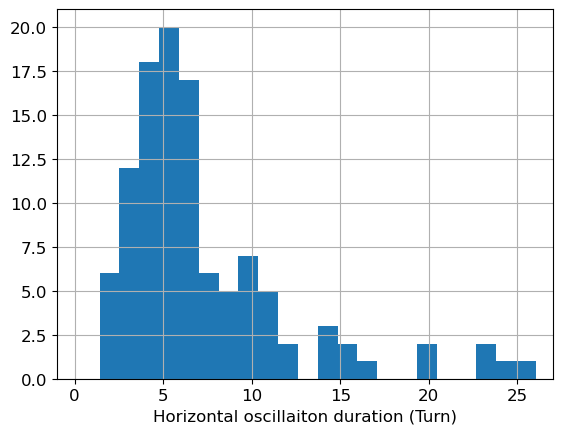

In [81]:
plt.hist(time_111_x,bins=80)
plt.grid()
plt.xlim(-1,27)
plt.xlabel('Horizontal oscillaiton duration (Turn)')
plt.show()

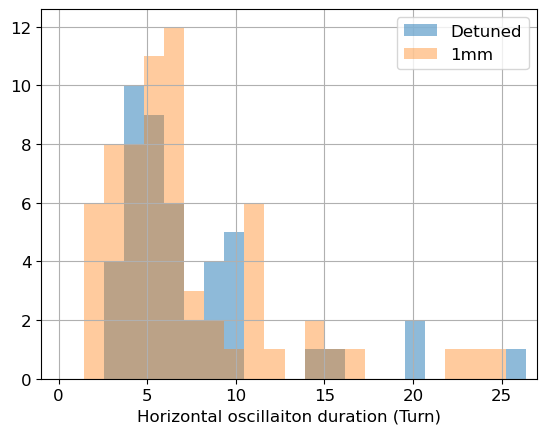

In [82]:
time_111_x=np.abs(time_111_x)
time_111_x_detuned = time_111_x[optics == 0]  # B=0のインデックスのA
time_111_x_1mm = time_111_x[optics == 1] # B=1のインデックスのA

# ヒストグラムの描画
bins = np.linspace(min(time_111_x), max(time_111_x), 80) 
plt.hist(time_111_x_detuned, bins=bins, color='tab:blue', alpha=0.5, label='Detuned')
plt.hist(time_111_x_1mm, bins=bins, color='tab:orange', alpha=0.4, label='1mm')
plt.grid()
plt.legend()
plt.xlim(-1,27)
plt.xlabel('Horizontal oscillaiton duration (Turn)')
plt.show()

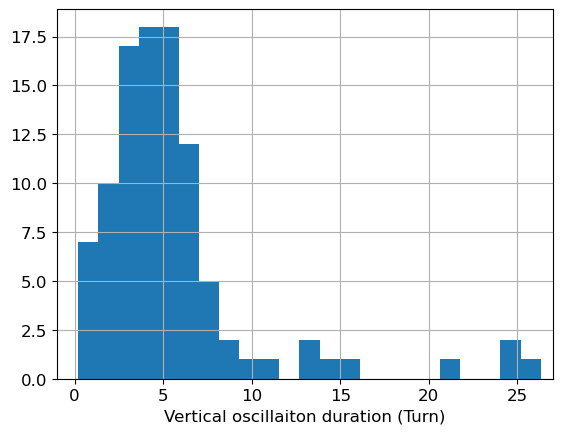

In [83]:
plt.hist(time_111_y,bins=80)
plt.grid()
plt.xlim(-1,27)
plt.xlabel('Vertical oscillaiton duration (Turn)')
plt.show()

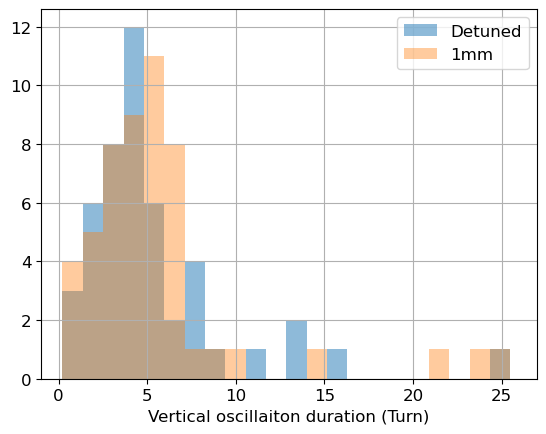

In [84]:
time_111_y=np.abs(time_111_y)
time_111_y_detuned = time_111_y[optics == 0]  # B=0のインデックスのA
time_111_y_1mm = time_111_y[optics == 1] # B=1のインデックスのA

# ヒストグラムの描画
bins = np.linspace(min(time_111_y), max(time_111_y), 80) 
plt.hist(time_111_y_detuned, bins=bins, color='tab:blue', alpha=0.5, label='Detuned')
plt.hist(time_111_y_1mm, bins=bins, color='tab:orange', alpha=0.4, label='1mm')
plt.grid()
plt.legend()
plt.xlim(-1,27)
plt.xlabel('Vertical oscillaiton duration (Turn)')
plt.show()

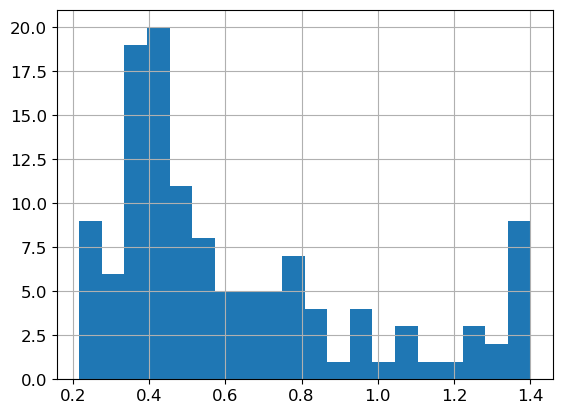

In [96]:
plt.hist(amp_111_x,bins=20)
plt.grid()
plt.show()

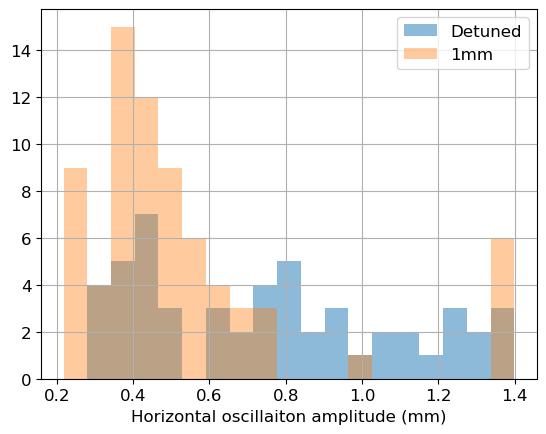

In [97]:
amp_111_x_detuned = amp_111_x[optics == 0]  # B=0のインデックスのA
amp_111_x_1mm = amp_111_x[optics == 1] # B=1のインデックスのA

# ヒストグラムの描画
bins = np.linspace(min(amp_111_x), max(amp_111_x), 20) 
plt.hist(amp_111_x_detuned, bins=bins, color='tab:blue', alpha=0.5, label='Detuned')
plt.hist(amp_111_x_1mm, bins=bins, color='tab:orange', alpha=0.4, label='1mm')
plt.grid()
plt.legend()
#plt.xlim(0,1)
plt.xlabel('Horizontal oscillaiton amplitude (mm)')
plt.show()

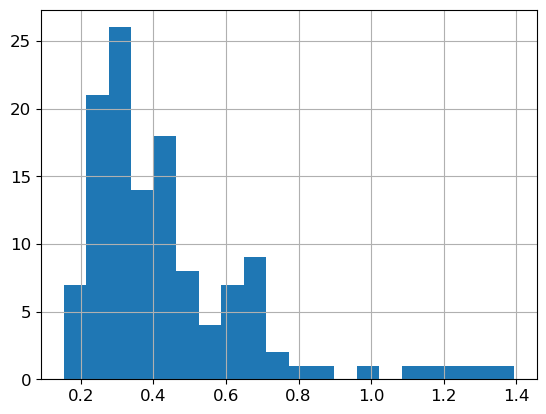

In [98]:
plt.hist(amp_111_y,bins=20)
plt.grid()
plt.show()

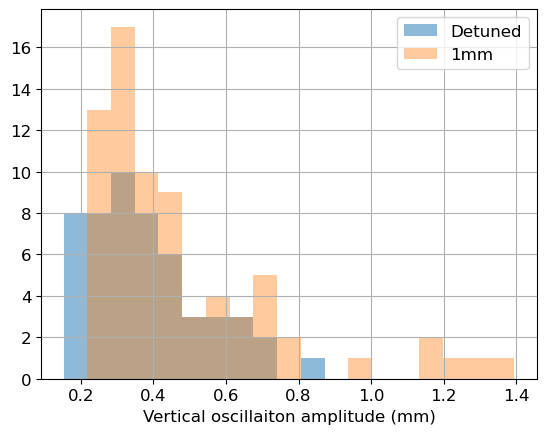

In [99]:
amp_111_y_detuned = amp_111_y[optics == 0]  # B=0のインデックスのA
amp_111_y_1mm = amp_111_y[optics == 1] # B=1のインデックスのA

# ヒストグラムの描画
bins = np.linspace(min(amp_111_y), max(amp_111_y), 20) 
plt.hist(amp_111_y_detuned, bins=bins, color='tab:blue', alpha=0.5, label='Detuned')
plt.hist(amp_111_y_1mm, bins=bins, color='tab:orange', alpha=0.4, label='1mm')
plt.grid()
plt.legend()
#plt.xlim(0,1)
plt.xlabel('Vertical oscillaiton amplitude (mm)')
plt.show()

# only 111 with pressure burst

In [109]:
D10_L02=[]
D10_L05=[]
D10_L07=[]
D10_L08=[]
D10_L06=[]
for i in range(len(zcu111_list)):
    if pressure[i]=='D10_L02/03':
        D10_L02.append(zcu111_list[i])
    if pressure[i]=='D10_L05':
        D10_L05.append(zcu111_list[i])
    if pressure[i]=='D10_L06':
        D10_L06.append(zcu111_list[i])
    if pressure[i]=='D10_L07':
        D10_L07.append(zcu111_list[i])
    if pressure[i]=='D10_L08':
        D10_L08.append(zcu111_list[i])


In [42]:
D10_L05

['LERFUJI_2024-10-22_00-58-30.npz',
 'LERFUJI_2024-10-22_09-37-16.npz',
 'LERFUJI_2024-10-22_09-56-32.npz',
 'LERFUJI_2024-10-27_21-28-33.npz',
 'LERFUJI_2024-10-28_02-30-07.npz',
 'LERFUJI_2024-10-29_19-49-12.npz',
 'LERFUJI_2024-10-30_02-30-10.npz']

In [111]:
D10_L02_x_detuned=[]
D10_L02_y_detuned=[]
D10_L05_x_detuned=[]
D10_L05_y_detuned=[]
D10_L07_x_detuned=[]
D10_L07_y_detuned=[]
D10_L08_x_detuned=[]
D10_L08_y_detuned=[]
D10_L06_x_detuned=[]
D10_L06_y_detuned=[]

D10_L02_x_1mm=[]
D10_L02_y_1mm=[]
D10_L05_x_1mm=[]
D10_L05_y_1mm=[]
D10_L07_x_1mm=[]
D10_L07_y_1mm=[]
D10_L08_x_1mm=[]
D10_L08_y_1mm=[]
D10_L06_x_1mm=[]
D10_L06_y_1mm=[]
for i in D10_L02:
    a,b,c,d,e=make_plot(i,'D10_L02/03')
    if optics[np.where(zcu111_list==i)[0][0]]==0:
        D10_L02_x_detuned.append(a)
        D10_L02_y_detuned.append(b)
    if optics[np.where(zcu111_list==i)[0][0]]==1:
        D10_L02_x_1mm.append(a)
        D10_L02_y_1mm.append(b)
for i in D10_L05:
    a,b,c,d,e=make_plot(i,'D10_L05')
    if optics[np.where(zcu111_list==i)[0][0]]==0:
        D10_L05_x_detuned.append(a)
        D10_L05_y_detuned.append(b)
    if optics[np.where(zcu111_list==i)[0][0]]==1:
        D10_L05_x_1mm.append(a)
        D10_L05_y_1mm.append(b)
for i in D10_L06:
    a,b,c,d,e=make_plot(i,'D10_L06')
    if optics[np.where(zcu111_list==i)[0][0]]==0:
        D10_L06_x_detuned.append(a)
        D10_L06_y_detuned.append(b)
    if optics[np.where(zcu111_list==i)[0][0]]==1:
        D10_L06_x_1mm.append(a)
        D10_L06_y_1mm.append(b)
for i in D10_L07:
    a,b,c,d,e=make_plot(i,'D10_L07')
    if optics[np.where(zcu111_list==i)[0][0]]==0:
        D10_L07_x_detuned.append(a)
        D10_L07_y_detuned.append(b)
    if optics[np.where(zcu111_list==i)[0][0]]==1:
        D10_L07_x_1mm.append(a)
        D10_L07_y_1mm.append(b)
for i in D10_L08:
    a,b,c,d,e=make_plot(i,'D10_L08')
    if optics[np.where(zcu111_list==i)[0][0]]==0:
        D10_L02_x_detuned.append(a)
        D10_L02_y_detuned.append(b)
    if optics[np.where(zcu111_list==i)[0][0]]==1:
        D10_L08_x_1mm.append(a)
        D10_L08_y_1mm.append(b)

524288
-409435
-399801
-79.967578125
-78.0859375
524288
-21322
-17306
-4.164257812499997
-3.3798828125
524288
-50658
-25074
-9.893945312500009
-4.897070312500006
524288
-23575
-13103
-4.604296875000003
-2.5589843750000085
524288
-30078
-20501
-5.8744140625000085
-4.00390625
524288
-23996
-20901
-4.6865234375
-4.08203125
524288
-100808
-67912
-19.68886718750001
-13.263867187499997
524288
-26088
0
-5.0951171875000085
-90.9998046875
524288
-38517
-7403
-7.522656249999997
-1.4457031250000085
524288
-24643
0
-4.8128906250000085
-86.9998046875
524288
-17736
0
-3.4638671875
-82.9998046875
524288
-24333
-22169
-4.7523437500000085
-4.329687500000006
524288
-51229
-39858
-10.005468750000006
-7.7845703125000085
524288
-52642
-34728
-10.281445312499997
-6.7826171875000085
524288
-240055
-44882
-46.885546875
-8.765820312499997
524288
-44431
-21099
-8.677734375
-4.120703125000006
524288
-80704
-56335
-15.762304687500006
-11.002734375000003
524288
-301670
-21971
-58.9197265625
-4.291015625
524288
-22

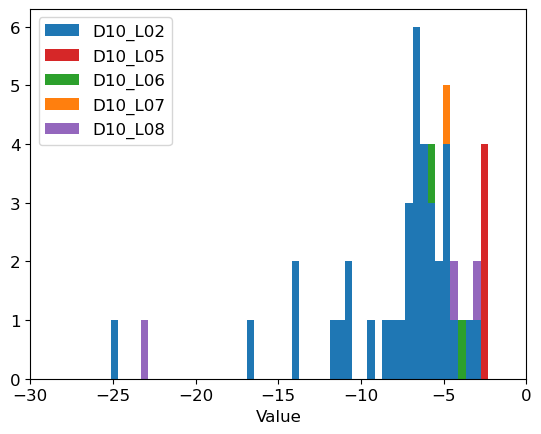

In [117]:
plt.hist([D10_L02_x_1mm,D10_L05_x_1mm,D10_L06_x_1mm,D10_L07_x_1mm,D10_L08_x_1mm], bins=170, stacked=True, 
         color=['tab:blue', 'tab:red', 'tab:green','tab:orange','tab:purple'], label=['D10_L02','D10_L05','D10_L06','D10_L07','D10_L08'])

# ラベル・凡例
plt.xlabel('Value')
plt.legend()
plt.xlim(-30,0)
plt.show()

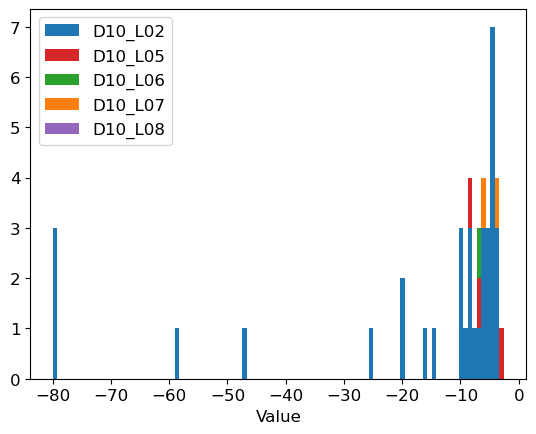

In [122]:
plt.hist([D10_L02_x_detuned,D10_L05_x_detuned,D10_L06_x_detuned,D10_L07_x_detuned,D10_L08_x_detuned], bins=100, stacked=True, 
         color=['tab:blue', 'tab:red', 'tab:green','tab:orange','tab:purple'], label=['D10_L02','D10_L05','D10_L06','D10_L07','D10_L08'])

# ラベル・凡例
plt.xlabel('Value')
plt.legend()
#plt.xlim(-30,0)
plt.show()

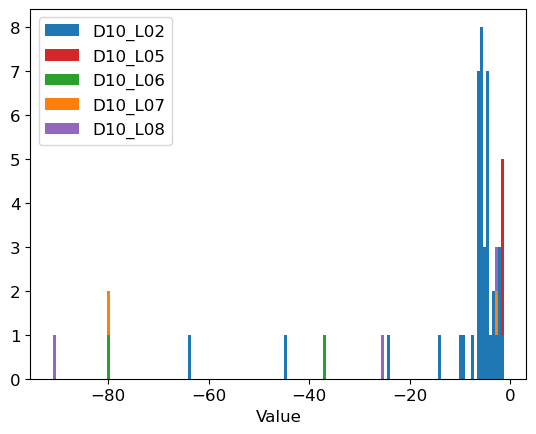

In [119]:
plt.hist([D10_L02_y_1mm,D10_L05_y_1mm,D10_L06_y_1mm,D10_L07_y_1mm,D10_L08_y_1mm], bins=150, stacked=True, 
         color=['tab:blue', 'tab:red', 'tab:green','tab:orange','tab:purple'], label=['D10_L02','D10_L05','D10_L06','D10_L07','D10_L08'])

# ラベル・凡例
plt.xlabel('Value')
plt.legend()
#plt.xlim(-15,0)
plt.show()

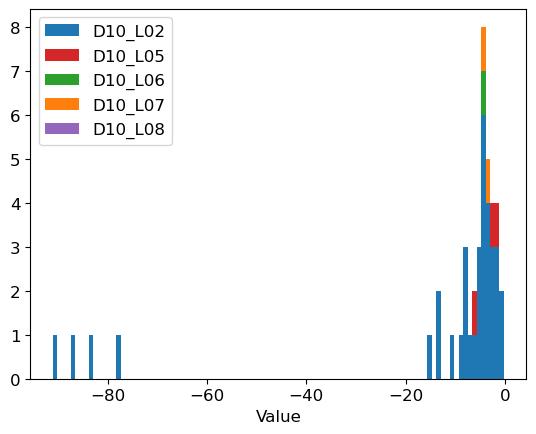

In [123]:
plt.hist([D10_L02_y_detuned,D10_L05_y_detuned,D10_L06_y_detuned,D10_L07_y_detuned,D10_L08_y_detuned], bins=100, stacked=True, 
         color=['tab:blue', 'tab:red', 'tab:green','tab:orange','tab:purple'], label=['D10_L02','D10_L05','D10_L06','D10_L07','D10_L08'])

# ラベル・凡例
plt.xlabel('Value')
plt.legend()
#plt.xlim(-30,0)
plt.show()

# combined analysis

In [12]:
zcu111_list=['LERFUJI_2024-10-27_13-43-55.npz',
 'LERFUJI_2024-10-27_15-10-13.npz',
 'LERFUJI_2024-10-27_15-32-04.npz',
 'LERFUJI_2024-10-27_21-28-33.npz',
 'LERFUJI_2024-10-27_23-44-12.npz',
 'LERFUJI_2024-10-28_02-06-05.npz',
 'LERFUJI_2024-10-28_02-30-07.npz',
 'LERFUJI_2024-10-28_02-55-30.npz',
 'LERFUJI_2024-10-28_19-13-27.npz',
 'LERFUJI_2024-10-29_01-41-14.npz',
 'LERFUJI_2024-10-29_03-00-30.npz',
 'LERFUJI_2024-10-29_15-19-37.npz',
 'LERFUJI_2024-10-29_17-51-52.npz',
 'LERFUJI_2024-10-29_19-49-12.npz',
 'LERFUJI_2024-10-29_22-59-36.npz',
 'LERFUJI_2024-10-29_23-49-03.npz',
 'LERFUJI_2024-10-30_02-02-03.npz',
 'LERFUJI_2024-10-30_02-30-10.npz',
 'LERFUJI_2024-11-01_03-49-06.npz',
 'LERFUJI_2024-11-01_04-31-16.npz',
 'LERFUJI_2024-11-02_08-54-09.npz',
 'LERFUJI_2024-11-02_12-30-45.npz',
 'LERFUJI_2024-11-02_13-51-41.npz',
 'LERFUJI_2024-11-02_16-48-53.npz',
 'LERFUJI_2024-11-02_19-05-51.npz',
 'LERFUJI_2024-11-03_01-33-25.npz',
 'LERFUJI_2024-11-03_03-33-06.npz',
 'LERFUJI_2024-11-03_03-58-26.npz',
 'LERFUJI_2024-11-03_11-46-08.npz',
 'LERFUJI_2024-11-03_17-35-45.npz',
 'LERFUJI_2024-11-03_17-56-46.npz',
 'LERFUJI_2024-11-03_20-11-52.npz',
 'LERFUJI_2024-11-03_23-57-50.npz',
 'LERFUJI_2024-11-04_04-14-19.npz',
 'LERFUJI_2024-11-04_09-57-37.npz',
 'LERFUJI_2024-11-04_14-40-20.npz',
 'LERFUJI_2024-11-04_21-12-50.npz',
 'LERFUJI_2024-11-04_22-05-43.npz',
 'LERFUJI_2024-11-05_04-53-14.npz',
 'LERFUJI_2024-11-05_10-06-20.npz',
 'LERFUJI_2024-11-05_10-37-18.npz',
 'LERFUJI_2024-11-05_11-56-33.npz',
 'LERFUJI_2024-11-05_16-29-27.npz',
 'LERFUJI_2024-11-05_20-32-53.npz',
 'LERFUJI_2024-11-06_04-06-18.npz',
 'LERFUJI_2024-11-06_05-48-50.npz',
 'LERFUJI_2024-11-07_16-25-57.npz',
 'LERFUJI_2024-11-08_08-50-27.npz',
 'LERFUJI_2024-11-08_16-43-14.npz',
 'LERFUJI_2024-11-08_16-58-08.npz',
 'LERFUJI_2024-11-09_08-59-06.npz',
 'LERFUJI_2024-11-09_23-06-12.npz',
 'LERFUJI_2024-11-10_03-27-52.npz',
 'LERFUJI_2024-11-11_05-25-24.npz',
 'LERFUJI_2024-11-11_10-54-27.npz',
 'LERFUJI_2024-11-11_11-42-48.npz',
 'LERFUJI_2024-11-11_12-41-57.npz',
 'LERFUJI_2024-11-12_19-38-00.npz',
 'LERFUJI_2024-11-13_23-16-26.npz',
 'LERFUJI_2024-11-15_08-22-08.npz',
 'LERFUJI_2024-11-15_20-34-41.npz',
 'LERFUJI_2024-11-16_01-15-10.npz',
 'LERFUJI_2024-11-16_03-39-21.npz',
 'LERFUJI_2024-11-18_03-28-51.npz',
 'LERFUJI_2024-11-22_23-42-46.npz']

pressure=['D10_L08',
'D10_L08',
'D10_L02/03',
'D10_L05',
'D05_L23',
'D10_L02/03',
'D10_L05',
'D10_L02/03',
'D10_L02/03',
'D10_L02/03',
'nan',
'D04_L07',
'D10_L02/03',
'D10_L05',
'D10_L02/03',
'D10_L02/03',
'D10_L02/03',
'D10_L05',
'D10_L02/03',
'D10_L07',
'D10_L02/03',
'D10_L02/03',
'D10_L02/03',
'nan',
'D10_L02/03',
'D10_L02/03',
'D10_L02/03',
'D10_L02/03',
'nan',
'nan',
'nan',
'D10_L02/03',
'D10_L02/03',
'D10_L02/03',
'D10_L02/03',
'D10_L02/03',
'D10_L02/03',
'D10_L02/03',
'D10_L02/03',
'D10_L02/03',
'D10_L02/03',
'D10_L02/03',
'D10_L02/03',
'D10_L02/03',
'D10_L02/03',
'D10_L02/03',
'nan',
'D10_L06',
'nan',
'nan',
'nan',
'nan',
'D10_L06',
'nan',
'D02_L25',
'nan',
'D10_L07',
'D11_L19',
'D08_L12',
'nan',
'D06_L12',
'D04_L02',
'D06_L12',
'D10_L02/03',
'D10_L08',]

In [13]:
def get_file_timestamp(filename):
    # ファイル名からタイムスタンプを抽出
    match = re.search(r'_(\d{4}-\d{2}-\d{2}_\d{2}-\d{2}-\d{2})\.npz$', filename)
    return match.group(1) if match else None

def generate_possible_timestamps(timestamp_str):
    # 文字列のタイムスタンプをdatetimeオブジェクトに変換
    timestamp = datetime.strptime(timestamp_str, "%Y-%m-%d_%H-%M-%S")
    # -1秒, 0秒, +1秒の3つのタイムスタンプを生成
    return [
        (timestamp + timedelta(seconds=offset)).strftime("%Y-%m-%d_%H-%M-%S")
        for offset in [-1, 0, 1]
    ]

def find_matching_files_from_lists(files_dir1, dir2):
    # ディレクトリ2のファイル名をセットに変換して検索を効率化
    files_dir2 = os.listdir(dir2)
    files_dir2_set = set(files_dir2)
    matching_files = []

    for file1 in files_dir1:
        timestamp_str = get_file_timestamp(file1)
        
        if timestamp_str:
            # ±1秒のタイムスタンプ候補を生成
            possible_timestamps = generate_possible_timestamps(timestamp_str)
            
            # ディレクトリ2に一致するタイムスタンプのファイルがあるか確認
            for ts in possible_timestamps:
                matching_file = next((f2 for f2 in files_dir2_set if ts in f2), None)
                if matching_file:
                    matching_files.append((file1, matching_file))
                    break  # 最初に一致したファイルのみ記録
    
    return matching_files

# 使用例
files_dir1 = zcu111_list
dir2 = '/mnt/SBOR/2024c_RFSoC/ZCU208/Abort/'
matches = find_matching_files_from_lists(files_dir1, dir2)

fuji_file = []
D5_file = []
# 結果の表示
for file1, file2 in matches:
    fuji_file.append(file1)
    D5_file.append(file2)
    print(f"Match found: {file1} in list, {file2} in dir2")

Match found: LERFUJI_2024-10-27_13-43-55.npz in list, LERD5_2024-10-27_13-43-55.npz in dir2
Match found: LERFUJI_2024-10-27_15-10-13.npz in list, LERD5_2024-10-27_15-10-13.npz in dir2
Match found: LERFUJI_2024-10-27_15-32-04.npz in list, LERD5_2024-10-27_15-32-04.npz in dir2
Match found: LERFUJI_2024-10-27_21-28-33.npz in list, LERD5_2024-10-27_21-28-33.npz in dir2
Match found: LERFUJI_2024-10-27_23-44-12.npz in list, LERD5_2024-10-27_23-44-12.npz in dir2
Match found: LERFUJI_2024-10-28_02-06-05.npz in list, LERD5_2024-10-28_02-06-05.npz in dir2
Match found: LERFUJI_2024-10-28_02-30-07.npz in list, LERD5_2024-10-28_02-30-07.npz in dir2
Match found: LERFUJI_2024-10-28_02-55-30.npz in list, LERD5_2024-10-28_02-55-30.npz in dir2
Match found: LERFUJI_2024-10-28_19-13-27.npz in list, LERD5_2024-10-28_19-13-27.npz in dir2
Match found: LERFUJI_2024-10-29_01-41-14.npz in list, LERD5_2024-10-29_01-41-14.npz in dir2
Match found: LERFUJI_2024-10-29_03-00-30.npz in list, LERD5_2024-10-29_03-00-30.

In [26]:
def make_spectrum(filename1,filename2,mark,pressure):
    npz_kw = np.load('/mnt/SBOR/2024c_RFSoC/ZCU111/Abort/'+filename1,allow_pickle=True)
    X_sum=npz_kw['X_sum']
    X_delta=npz_kw['X_delta']
    Y_sum=npz_kw['Y_sum']
    Y_delta=npz_kw['Y_delta']

    
    if filename1=="LERFUJI_2024-10-16_08-57-48.npz" or filename1=="LERFUJI_2024-10-16_02-27-58.npz":
        return np.nan,np.nan,np.nan,np.nan
    if filename1=="LERFUJI_2024-10-15_19-08-53.npz":
        return np.nan,np.nan,np.nan,np.nan
    if filename1=="LERFUJI_2024-10-16_01-58-36.npz":
        Y_sum=np.zeros(len(Y_delta))

    timesteps2=np.arange(len(X_sum))/509
    timesteps2=timesteps2-timesteps2[-1]
    
    ##################    



    df = pd.DataFrame({'x':timesteps2,'X_sum':X_sum,'X_delta':X_delta,'Y_sum':Y_sum,'Y_delta':Y_delta})
    threshold=2000
    # 条件に従って 'result' を計算
    df['result_x'] = np.where(df['X_sum'] > threshold, df['X_delta'] / df['X_sum']*(16.58/5), 0)
    # 'result' から オフセットの値を引き算
    df['result_diff_x'] = df['result_x'] 
    offset = df['result_x'].iloc[0:5120].reset_index(drop=True)  # 1行目から5120行目の値
    for i in range(1, len(df) // 5120):
        start = i * 5120
        end = start + 5120-1
        df.loc[start:end, 'result_diff_x'] -= offset.values
    # 絶対値が 0.4 を超える場合は 0 に設定
    df['result_diff_x'] = np.where(abs(df['result_diff_x']) > 0.7, 0, df['result_diff_x'])
    # 'X_sum' が 2000 より小さい行の 'result' を NaN にする
    df['result_diff_x'] = np.where(df['X_sum'] <= threshold, np.nan, df['result_diff_x'])
    moving_avg = df['result_diff_x'].dropna().rolling(window=500).mean()
    moving_std = df['result_diff_x'].dropna().rolling(window=500).std()
    # 元のDataFrameに移動平均をマージ
    df['x_moving_avg'] = moving_avg.reindex(df.index)
    df['x_moving_std'] = moving_std.reindex(df.index)
    df['result_diff_x'] = np.where(df['X_sum'] <= threshold, 0, df['result_diff_x'])
    df['result_interp_x']=df['result_diff_x']#.interpolate(method='spline',order=1)

    df['result_y'] = np.where(df['X_sum'] > threshold, df['Y_delta'] / df['Y_sum']*(16.58/5), 0)
    # 'result' から 51200 行上の値を引き算
    df['result_diff_y'] = df['result_y']
    offset = df['result_y'].iloc[0:5120].reset_index(drop=True)  # 1行目から5120行目の値
    for i in range(1, len(df) // 5120):
        start = i * 5120
        end = start + 5120-1
        df.loc[start:end, 'result_diff_y'] -= offset.values
    # 絶対値が 0.4 を超える場合は 0 に設定
    df['result_diff_y'] = np.where(abs(df['result_diff_y']) > 0.7, 0, df['result_diff_y'])
    # 'X_sum' が 2000 より小さい行の 'result' を NaN にする
    df['result_diff_y'] = np.where(df['X_sum'] <= threshold, np.nan, df['result_diff_y'])
    moving_avg = df['result_diff_y'].dropna().rolling(window=500).mean()
    moving_std = df['result_diff_y'].dropna().rolling(window=500).std()
    # 元のDataFrameに移動平均をマージ
    df['y_moving_avg'] = moving_avg.reindex(df.index)
    df['y_moving_std'] = moving_std.reindex(df.index)
    df['result_diff_y'] = np.where(df['X_sum'] <= threshold, 0, df['result_diff_y'])
    df['result_interp_y']=df['result_diff_y']#.interpolate(method='spline',order=1)

    # 条件に従って 'result' を計算
    df['result_charge'] = np.where(df['X_sum'] > threshold,  df['X_sum']+df['Y_sum'], np.nan)
    # 'result' から 51200 行上の値を引き算
    df['result_diff_charge'] = df['result_charge'] / df['result_charge'].shift(51200)

    condition = df['X_sum'] <= 2000
    # 連続する2000以下の行数をカウント
    df['group'] = (condition != condition.shift()).cumsum()
    df['count'] = df.groupby('group')['X_sum'].transform('size')
    # 2000以下の連続が300行以上になる部分を削除
    index_to_drop = df[(condition) & (df['count'] >= 300)].index[0] if len(df[(condition) & (df['count'] >= 300)]) > 0 else None
    # 該当部分を削除
    if index_to_drop is not None:
        df = df[:index_to_drop]  # 連続部分の開始行以降を削除



    step_size = 40
    turn=len(df)//5120-10
    if turn<10:
        return np.nan
    tbtdata_111_x=df['result_interp_x'].iloc[len(df)-5120*turn:len(df)-0*5120].values
    tbtdata_111_x_ma=df['x_moving_avg'].iloc[len(df)-5120*turn:len(df)-0*5120].values
    tbtdata_111_x_std=df['x_moving_std'].iloc[len(df)-5120*turn:len(df)-0*5120].values
    tbtdata_111_y=df['result_interp_y'].iloc[len(df)-5120*turn:len(df)-0*5120].values
    tbtdata_111_y_ma=df['y_moving_avg'].iloc[len(df)-5120*turn:len(df)-0*5120].values
    tbtdata_111_y_std=df['y_moving_std'].iloc[len(df)-5120*turn:len(df)-0*5120].values
    charge_111=df['result_diff_charge'].iloc[len(df)-5120*turn:len(df)-0*5120].values
    
    #tbtdata_111=tbtdata_111.reshape(turn,5120)
    turn111=turn

    a=tbtdata_111_x_ma[-80*5120:]
    b=tbtdata_111_x_std[-80*5120:]*0.6
    index_111 = next(
            (i for i, (a_val, b_val) in enumerate(zip(a, b))
             if not np.isnan(a_val) and not np.isnan(b_val) and abs(a_val) > b_val),
            80*5120
        )
    index_111=index_111-80*5120
    print(index_111)
    a=tbtdata_111_y_ma[-80*5120:]
    b=tbtdata_111_y_std[-80*5120:]*0.6
    index_111_y = next(
            (i for i, (a_val, b_val) in enumerate(zip(a, b))
             if not np.isnan(a_val) and not np.isnan(b_val) and abs(a_val) > b_val),
            80*5120
        )
    index_111_y=index_111_y-80*5120
    print(index_111_y)


    #######################################
    #
    #               ZCU208
    #
    ########################################
    npz_kw = np.load('/mnt/SBOR/2024c_RFSoC/ZCU208/Abort/'+filename2,allow_pickle=True)
    AC_sum=npz_kw['AC_sum']
    AC_delta=npz_kw['AC_delta']
    BD_sum=npz_kw['BD_sum']
    BD_delta=npz_kw['BD_delta']

    
    timesteps2=np.arange(len(AC_sum))/5120
    timesteps2=timesteps2-timesteps2[-1]

    ##################    


    df = pd.DataFrame({'x':timesteps2,'AC_sum':AC_sum,'AC_delta':AC_delta,'BD_sum':BD_sum,'BD_delta':BD_delta})
    threshold=500
    # 条件に従って 'result' を計算
    df['result_AC'] = np.where(df['AC_sum'] > threshold, df['AC_delta'] / df['AC_sum']*(16.58/5), 0)
    # 'result' から 51200 行上の値を引き算
    df['result_diff_AC'] = df['result_AC']
    offset = df['result_AC'].iloc[0:5120].reset_index(drop=True)  # 1行目から5120行目の値
    for i in range(1, len(df) // 5120):
        start = i * 5120
        end = start + 5120-1
        df.loc[start:end, 'result_diff_AC'] -= offset.values
    # 絶対値が 0.4 を超える場合は 0 に設定
    df['result_diff_AC'] = np.where(abs(df['result_diff_AC']) > 0.7, 0, df['result_diff_AC'])
    # 'X_sum' が 2000 より小さい行の 'result' を NaN にする
    df['result_diff_AC'] = np.where(df['AC_sum'] <= threshold, np.nan, df['result_diff_AC'])
    moving_avg = df['result_diff_AC'].dropna().rolling(window=500).mean()
    moving_std = df['result_diff_AC'].dropna().rolling(window=500).std()
    # 元のDataFrameに移動平均をマージ
    df['AC_moving_avg'] = moving_avg.reindex(df.index)
    df['AC_moving_std'] = moving_std.reindex(df.index)
    df['result_diff_AC'] = np.where(df['AC_sum'] <= threshold, 0, df['result_diff_AC'])
    df['result_interp_AC']=df['result_diff_AC']#.interpolate(method='spline',order=1)

    # 条件に従って 'result' を計算
    df['result_BD'] = np.where(df['AC_sum'] > threshold, df['BD_delta'] / df['BD_sum']*(16.58/5), 0)
    # 'result' から 51200 行上の値を引き算
    df['result_diff_BD'] = df['result_BD']
    offset = df['result_BD'].iloc[0:5120].reset_index(drop=True)  # 1行目から5120行目の値
    for i in range(1, len(df) // 5120):
        start = i * 5120
        end = start + 5120-1
        df.loc[start:end, 'result_diff_BD'] -= offset.values
    # 絶対値が 0.4 を超える場合は 0 に設定
    df['result_diff_BD'] = np.where(abs(df['result_diff_BD']) > 0.7, 0, df['result_diff_BD'])
    # 'X_sum' が 2000 より小さい行の 'result' を NaN にする
    df['result_diff_BD'] = np.where(df['AC_sum'] <= threshold, np.nan, df['result_diff_BD'])
    moving_avg = df['result_diff_BD'].dropna().rolling(window=500).mean()
    moving_std = df['result_diff_BD'].dropna().rolling(window=500).std()
    # 元のDataFrameに移動平均をマージ
    df['BD_moving_avg'] = moving_avg.reindex(df.index)
    df['BD_moving_std'] = moving_std.reindex(df.index)
    df['result_diff_BD'] = np.where(df['AC_sum'] <= threshold, 0, df['result_diff_BD'])
    df['result_interp_BD']=df['result_diff_BD']#.interpolate(method='spline',order=1)

    # 条件に従って 'result' を計算
    df['result_charge'] = np.where(df['AC_sum'] > threshold,  df['AC_sum'], np.nan)
    # 'result' から 51200 行上の値を引き算
    df['result_diff_charge'] = df['result_charge'] / df['result_charge'].shift(51200)
    
    df['result_diff_x']=(df['result_interp_AC']-df['result_interp_BD'])/np.sqrt(2)
    # 'X_sum' が 2000 より小さい行の 'result' を NaN にする
    df['result_diff_x'] = np.where(df['AC_sum'] <= threshold, np.nan, df['result_diff_x'])
    moving_avg = df['result_diff_x'].dropna().rolling(window=500).mean()
    moving_std = df['result_diff_x'].dropna().rolling(window=500).std()
    # 元のDataFrameに移動平均をマージ
    df['x_moving_avg'] = moving_avg.reindex(df.index)
    df['x_moving_std'] = moving_std.reindex(df.index)
    df['result_diff_x'] = np.where(df['AC_sum'] <= threshold, 0, df['result_diff_x'])
    df['result_interp_x']=df['result_diff_x']#.interpolate(method='spline',order=1)
    
    df['result_diff_y']=(df['result_interp_AC']+df['result_interp_BD'])/np.sqrt(2)
    # 'X_sum' が 2000 より小さい行の 'result' を NaN にする
    df['result_diff_y'] = np.where(df['AC_sum'] <= threshold, np.nan, df['result_diff_y'])
    moving_avg = df['result_diff_y'].dropna().rolling(window=500).mean()
    moving_std = df['result_diff_y'].dropna().rolling(window=500).std()
    # 元のDataFrameに移動平均をマージ
    df['y_moving_avg'] = moving_avg.reindex(df.index)
    df['y_moving_std'] = moving_std.reindex(df.index)
    df['result_diff_y'] = np.where(df['AC_sum'] <= threshold, 0, df['result_diff_y'])
    df['result_interp_y']=df['result_diff_y']#.interpolate(method='spline',order=1)

    condition = df['AC_sum'] <= 2000
    # 連続する2000以下の行数をカウント
    df['group'] = (condition != condition.shift()).cumsum()
    df['count'] = df.groupby('group')['AC_sum'].transform('size')
    # 2000以下の連続が300行以上になる部分を削除
    index_to_drop = df[(condition) & (df['count'] >= 300)].index[0] if len(df[(condition) & (df['count'] >= 300)]) > 0 else None
    # 該当部分を削除
    if index_to_drop is not None:
        df = df[:index_to_drop]  # 連続部分の開始行以降を削除


    step_size = 40
    turn=len(df)//5120-10
    if turn<10:
        return np.nan,np.nan,np.nan,np.nan
    tbtdata_208_x=df['result_interp_x'].iloc[len(df)-5120*turn:len(df)-0*5120].values
    tbtdata_208_x_ma=df['x_moving_avg'].iloc[len(df)-5120*turn:len(df)-0*5120].values
    tbtdata_208_x_std=df['x_moving_std'].iloc[len(df)-5120*turn:len(df)-0*5120].values
    tbtdata_208_y=df['result_interp_y'].iloc[len(df)-5120*turn:len(df)-0*5120].values
    tbtdata_208_y_ma=df['y_moving_avg'].iloc[len(df)-5120*turn:len(df)-0*5120].values
    tbtdata_208_y_std=df['y_moving_std'].iloc[len(df)-5120*turn:len(df)-0*5120].values
    charge_208=df['result_diff_charge'].iloc[len(df)-5120*turn:len(df)-0*5120].values

    if mark==1:
        tbtdata_208_x=df['result_interp_AC'].iloc[len(df)-5120*turn:len(df)-0*5120].values
        tbtdata_208_x_ma=df['AC_moving_avg'].iloc[len(df)-5120*turn:len(df)-0*5120].values
        tbtdata_208_x_std=df['AC_moving_std'].iloc[len(df)-5120*turn:len(df)-0*5120].values
        tbtdata_208_y=df['result_interp_BD'].iloc[len(df)-5120*turn:len(df)-0*5120].values
        tbtdata_208_y_ma=df['BD_moving_avg'].iloc[len(df)-5120*turn:len(df)-0*5120].values
        tbtdata_208_y_std=df['BD_moving_std'].iloc[len(df)-5120*turn:len(df)-0*5120].values
        charge_208=df['result_diff_charge'].iloc[len(df)-5120*turn:len(df)-0*5120].values
    turn208=turn

    a=tbtdata_208_x_ma[-80*5120:]
    b=tbtdata_208_x_std[-80*5120:]*0.7
    index_208 = next(
            (i for i, (a_val, b_val) in enumerate(zip(a, b))
             if not np.isnan(a_val) and not np.isnan(b_val) and abs(a_val) > b_val),
            80*5120
        )
    index_208=index_208-80*5120
    print(index_208)
    a=tbtdata_208_y_ma[-80*5120:]
    b=tbtdata_208_y_std[-80*5120:]*0.7
    index_208_y = next(
            (i for i, (a_val, b_val) in enumerate(zip(a, b))
             if not np.isnan(a_val) and not np.isnan(b_val) and abs(a_val) > b_val),
            80*5120
        )
    index_208_y=index_208_y-80*5120
    print(index_208_y)


    ##########  PLOT  ############
    fig, (ax1,ax2,ax3,ax4,ax5,ax6) = plt.subplots(6, 1, sharex=True,figsize=(16,12))
    timeaxis=np.arange(len(tbtdata_111_x))/5120
    timeaxis=timeaxis-timeaxis[-1]
    ax1.set_title(f'{filename1[8:-4]} / Pressure burst : {pressure}')
    ax1.scatter(timeaxis,tbtdata_111_x,c='red',s=1)
    ax1.plot(timeaxis,tbtdata_111_x_ma,'o-',c='green',markersize=0.02)
    #ax1.plot(timeaxis,tbtdata_111_x_std,'o-',c='green',markersize=1)
    time_111=timeaxis[index_111]
    ax1.vlines(time_111,-0.6,0.6)
    ax1.grid()
    ax1.set_ylim(-0.6,0.6)
    ax1.set_ylabel('Fuji X pos (mm)')
    timeaxis=np.arange(len(tbtdata_111_y))/5120
    timeaxis=timeaxis-timeaxis[-1]
    ax2.scatter(timeaxis,tbtdata_111_y,c='red',s=1)
    ax2.plot(timeaxis,tbtdata_111_y_ma,'o-',c='green',markersize=0.02)
    #ax2.plot(timeaxis,tbtdata_111_y_std,'o-',c='green',markersize=1)
    time_111_y=timeaxis[index_111_y]
    ax2.vlines(time_111_y,-0.6,0.6)
    ax2.grid()
    ax2.set_ylim(-0.6,0.6)
    #ax2.set_xticks([-15,-14,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0])
    ax2.set_ylabel('Fuji Y pos (mm)')
    
    timeaxis=np.arange(len(charge_111))/5120
    timeaxis=timeaxis-timeaxis[-1]
    ax3.scatter(timeaxis,charge_111,c='blue',s=1)
    index_charge_111 = next((i for i, x in enumerate(charge_111[-5120*10:]) if x < 0.95), None)
    if index_charge_111 is None:
        print('not SBL')
        plt.close()
        return 
    index_charge_111+=5120*10
    charge_time_111=timeaxis[len(charge_111)-5120*20+index_charge_111]
    ax3.vlines(charge_time_111,0,1.2)
    ax3.grid()
    ax3.set_ylim(0,1.2)
    #ax3.set_xticks([-15,-14,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0])
    ax3.set_ylabel('Fuji charge (a.u.)')

    timeaxis=np.arange(len(tbtdata_208_x))/5120
    timeaxis=timeaxis-timeaxis[-1]-1
    #ax4.set_title(f'{filename1[8:-4]}')
    ax4.scatter(timeaxis,tbtdata_208_x,c='red',s=1)
    ax4.plot(timeaxis,tbtdata_208_x_ma,'o-',c='green',markersize=0.02)
    #ax1.plot(timeaxis,tbtdata_111_x_std,'o-',c='green',markersize=1)
    time_208=timeaxis[index_208]
    ax4.vlines(time_208,-0.8,0.8)
    ax4.grid()
    ax4.set_ylim(-0.8,0.8)
    ax4.set_ylabel('D5 X pos (mm)')
    timeaxis=np.arange(len(tbtdata_208_y))/5120
    timeaxis=timeaxis-timeaxis[-1]-1
    ax5.scatter(timeaxis,tbtdata_208_y,c='red',s=1)
    ax5.plot(timeaxis,tbtdata_208_y_ma,'o-',c='green',markersize=0.02)
    #ax2.plot(timeaxis,tbtdata_111_y_std,'o-',c='green',markersize=1)
    time_208_y=timeaxis[index_208_y]
    ax5.vlines(time_208_y,-0.8,0.8)
    ax5.grid()
    ax5.set_ylim(-0.8,0.8)
    ax5.set_xticks([-15,-14,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0])
    ax5.set_ylabel('D5 Y pos (mm)')

    timeaxis=np.arange(len(charge_208))/5120
    timeaxis=timeaxis-timeaxis[-1]-1
    ax6.scatter(timeaxis,charge_208,c='blue',s=1)
    index_charge_208 =next((i for i, x in enumerate(charge_208[-5120*10:]) if x < 0.97), 5120*10)
    if index_charge_208 is None:
        index
    index_charge_208+=5120*10
    charge_time_208=timeaxis[len(charge_208)-5120*20+index_charge_208]
    ax6.vlines(charge_time_208,0,1.2)
    ax6.grid()
    ax6.set_ylim(0,1.2)
    ax6.set_ylabel('D5 charge (a.u.)')
    ax6.set_xticks([-15,-14,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0])
    
    plt.xlim(-15,0)
    plt.xlabel('Turn')
    plt.savefig(f'masterthesis/combined/{filename1[8:-4]}.png',dpi=100)
    plt.close()

    fig, (ax1,ax2,ax3,ax4,ax5,ax6) = plt.subplots(6, 1, sharex=True,figsize=(16,12))
    timeaxis=np.arange(len(tbtdata_111_x))/5120
    timeaxis=timeaxis-timeaxis[-1]
    ax1.set_title(f'{filename1[8:-4]} / Pressure burst : {pressure}')
    ax1.scatter(timeaxis,tbtdata_111_x,c='red',s=1)
    ax1.plot(timeaxis,tbtdata_111_x_ma,'o-',c='green',markersize=0.02)
    #ax1.plot(timeaxis,tbtdata_111_x_std,'o-',c='green',markersize=1)
    time_111=timeaxis[index_111]
    ax1.vlines(time_111,-0.6,0.6)
    ax1.grid()
    ax1.set_ylim(-0.6,0.6)
    ax1.set_ylabel('Fuji X pos (mm)')
    timeaxis=np.arange(len(tbtdata_111_y))/5120
    timeaxis=timeaxis-timeaxis[-1]
    ax2.scatter(timeaxis,tbtdata_111_y,c='red',s=1)
    ax2.plot(timeaxis,tbtdata_111_y_ma,'o-',c='green',markersize=0.02)
    #ax2.plot(timeaxis,tbtdata_111_y_std,'o-',c='green',markersize=1)
    time_111_y=timeaxis[index_111_y]
    ax2.vlines(time_111_y,-0.6,0.6)
    ax2.grid()
    ax2.set_ylim(-0.6,0.6)
    #ax2.set_xticks([-15,-14,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0])
    ax2.set_ylabel('Fuji Y pos (mm)')
    
    timeaxis=np.arange(len(charge_111))/5120
    timeaxis=timeaxis-timeaxis[-1]
    ax3.scatter(timeaxis,charge_111,c='blue',s=1)
    index_charge_111 = next((i for i, x in enumerate(charge_111[-5120*10:]) if x < 0.95), None)
    if index_charge_111 is None:
        print('not SBL')
        plt.close()
        return 
    index_charge_111+=5120*10
    charge_time_111=timeaxis[len(charge_111)-5120*20+index_charge_111]
    ax3.vlines(charge_time_111,0,1.2)
    ax3.grid()
    ax3.set_ylim(0,1.2)
    #ax3.set_xticks([-15,-14,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0])
    ax3.set_ylabel('Fuji charge (a.u.)')

    timeaxis=np.arange(len(tbtdata_208_x))/5120
    timeaxis=timeaxis-timeaxis[-1]-1
    #ax4.set_title(f'{filename1[8:-4]}')
    ax4.scatter(timeaxis,tbtdata_208_x,c='red',s=1)
    ax4.plot(timeaxis,tbtdata_208_x_ma,'o-',c='green',markersize=0.02)
    #ax1.plot(timeaxis,tbtdata_111_x_std,'o-',c='green',markersize=1)
    time_208=timeaxis[index_208]
    ax4.vlines(time_208,-0.8,0.8)
    ax4.grid()
    ax4.set_ylim(-0.8,0.8)
    ax4.set_ylabel('D5 X pos (mm)')
    timeaxis=np.arange(len(tbtdata_208_y))/5120
    timeaxis=timeaxis-timeaxis[-1]-1
    ax5.scatter(timeaxis,tbtdata_208_y,c='red',s=1)
    ax5.plot(timeaxis,tbtdata_208_y_ma,'o-',c='green',markersize=0.02)
    #ax2.plot(timeaxis,tbtdata_111_y_std,'o-',c='green',markersize=1)
    time_208_y=timeaxis[index_208_y]
    ax5.vlines(time_208_y,-0.8,0.8)
    ax5.grid()
    ax5.set_ylim(-0.8,0.8)
    #ax5.set_xticks([-15,-14,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0])
    ax5.set_ylabel('D5 Y pos (mm)')

    timeaxis=np.arange(len(charge_208))/5120
    timeaxis=timeaxis-timeaxis[-1]-1
    ax6.scatter(timeaxis,charge_208,c='blue',s=1)
    index_charge_208 =next((i for i, x in enumerate(charge_208[-5120*10:]) if x < 0.97), 5120*10)
    if index_charge_208 is None:
        index
    index_charge_208+=5120*10
    charge_time_208=timeaxis[len(charge_208)-5120*20+index_charge_208]
    ax6.vlines(charge_time_208,0,1.2)
    ax6.grid()
    ax6.set_ylim(0,1.2)
    ax6.set_ylabel('D5 charge (a.u.)')
    #ax6.set_xticks([-15,-14,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0])
    
    plt.xlim(-80,0)
    plt.xlabel('Turn')
    plt.savefig(f'masterthesis/combined/{filename1[8:-4]}_2.png',dpi=100)
    plt.close()

    
    
    return time_111, time_111_y,time_208,time_208_y

In [27]:
#target_datetime = datetime(2024, 10, 27, 7, 0, 0)
time_111_x=[]
time_111_y=[]
time_208_x=[]
time_208_y=[]
for i in range(len(fuji_file)):
    print(fuji_file[i])
    mark=0
    #datetime_str = fuji_file[i][8:-4]  # "YYYYMMDD_HHMMSS" 部分
    #file_datetime = datetime.strptime(datetime_str, "%Y-%m-%d_%H-%M-%S")
    #if file_datetime < target_datetime:
    #    mark=1
    a,b,c,d=make_spectrum(fuji_file[i],D5_file[i],mark=mark,pressure=pressure[i])
    time_111_x.append(a)
    time_111_y.append(b)
    time_208_x.append(c)
    time_208_y.append(d)

LERFUJI_2024-10-27_13-43-55.npz
-22580
-14478
-9354
-22166
LERFUJI_2024-10-27_15-10-13.npz
-117414
-129458
-124775
-123548
LERFUJI_2024-10-27_15-32-04.npz
-55922
-47376
-37130
-28190
LERFUJI_2024-10-27_21-28-33.npz
-11807
-6714
-6420
-6655
LERFUJI_2024-10-27_23-44-12.npz
-22814
-22804
-16316
-10610
LERFUJI_2024-10-28_02-06-05.npz
-31779
-30813
-25891
0
LERFUJI_2024-10-28_02-30-07.npz
-12606
-6683
-6685
-6491
LERFUJI_2024-10-28_02-55-30.npz
-26419
-22357
-16822
-6962
LERFUJI_2024-10-28_19-13-27.npz
-126510
-124242
-395692
-98814
LERFUJI_2024-10-29_01-41-14.npz
-18148
-11607
0
-1692
LERFUJI_2024-10-29_03-00-30.npz
-13610
-8905
-404810
-4791
LERFUJI_2024-10-29_15-19-37.npz
-21508
-13925
-6419
0
LERFUJI_2024-10-29_17-51-52.npz
-40017
-29322
-14027
0
LERFUJI_2024-10-29_19-49-12.npz
-13292
-7437
-7392
-2163
LERFUJI_2024-10-29_22-59-36.npz
-71229
-33627
-171695
-14664
LERFUJI_2024-10-29_23-49-03.npz
-34963
-33913
-230480
0
LERFUJI_2024-10-30_02-02-03.npz
-28611
-22055
-222811
-8251
LERFUJI_20

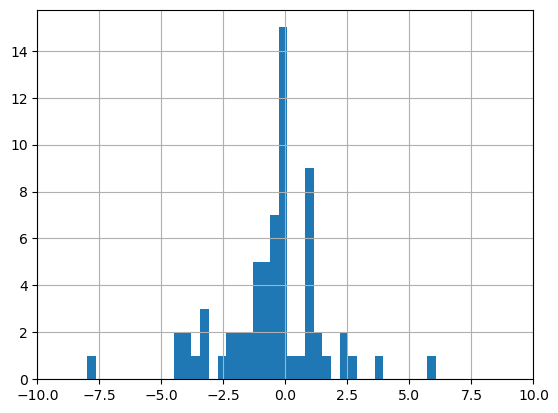

In [19]:
plt.hist(np.fmin(np.array(time_111_x),np.array(time_111_y))-np.fmin(np.array(time_208_x),np.array(time_208_y)),bins=500)
plt.grid()
plt.xlim(-10,10)
plt.show()